<a href="https://colab.research.google.com/github/aysharega/M.Tech-Project-Thesis/blob/main/Hand_Gesture_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/dataset1/train'
valid_path = '/content/drive/MyDrive/Datasets/dataset1/test'

VGG NET BASED FEATURE SELECTION

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Datasets/dataset1/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy','AUC','Precision','Recall']
)


In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5600 images belonging to 3 classes.


In [14]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 204,
                                            class_mode = 'categorical')

Found 4568 images belonging to 3 classes.


In [21]:
r=model.fit_generator(training_set,
samples_per_epoch = 2000,
                         nb_epoch = 5,
                         validation_data = test,
                         nb_val_samples = 1000)


NameError: ignored

In [22]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_generator,
  epochs=15,
  steps_per_epoch=8,
  validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
8/8 [==============================] - 182s 23s/step - loss: 1.8267 - accuracy: 0.4609 - auc: 0.6048 - precision: 0.4779 - recall: 0.4219 - val_loss: 1.2580 - val_accuracy: 0.6471 - val_auc: 0.7607 - val_precision: 0.6633 - val_recall: 0.6471
Epoch 2/15
8/8 [==============================] - 145s 20s/step - loss: 0.5236 - accuracy: 0.7891 - auc: 0.9245 - precision: 0.8033 - recall: 0.7656 - val_loss: 0.2139 - val_accuracy: 0.9730 - val_auc: 0.9913 - val_precision: 0.9730 - val_recall: 0.9730
Epoch 3/15
8/8 [==============================] - 107s 15s/step - loss: 0.2504 - accuracy: 0.8984 - auc: 0.9867 - precision: 0.9417 - recall: 0.8828 - val_loss: 0.1082 - val_accuracy: 0.9926 - val_auc: 0.9992 - val_precision: 0.9926 - val_recall: 0.9926
Epoch 4/15
8/8 [==============================] - 104s 14s/step - loss: 0.1091 - accuracy: 0.9922 - auc: 0.9972 - precision: 0.9922 - recall: 0.9922 - val_loss: 0.0816 - val_accuracy: 0.9828 - val_auc: 0.9995 - val_precision: 0.9828 - val

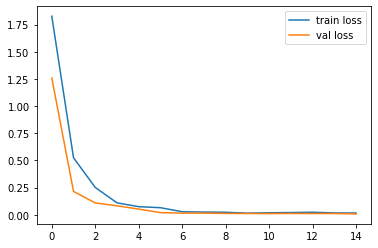

<Figure size 432x288 with 0 Axes>

In [23]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

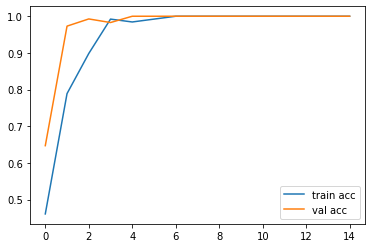

<Figure size 432x288 with 0 Axes>

In [24]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
